# Решение задачи оптимального управления

## Постановка задачи

$$\tag{0}
\begin{cases}
 & \dot{x_1} = x_2  \\ 
 & \dot{x_2} = - x_2 + u
\end{cases}
$$

**Цель:** описать контроллер, переводящий описанную систему из состояния $\mathbf{x}(0) = \mathbf{0}$ на линию:

$$x_1 + 5x_2 = 15$$

и *минимизирующий* функционал:

$$
J = \frac{1}{2}(x_1(2) - 5)^2 + \frac{1}{2}(x_2(2) - 2)^2 + \frac{1}{2}\int_0^2u^2dt
$$

## Принцип максимума Понтрягина

Вектор сопряжённых переменных:
$$p \in \mathbf{R}^2$$

Функция Гамильтона-Понтрягина (гамильтониан):
$$H(x,p,u,t) = p'\cdot f - \lambda_0\cdot f_0$$

где $f_0$ есть функция под интегралом в минимизируемом функционале, $\lambda_0 \geq 0$ .

Дифференциальные уравнения для фазовых и сопряжённых переменных:

$$\begin{equation}\tag{1}
 \left\{
    \begin{array}\\
       \dot{x} = \frac{\partial H}{\partial p} \\
       \dot{p} = -\frac{\partial H}{\partial x} 
    \end{array}   
\right.
\end{equation}$$

Подставляя известные выражения, получаю соотношение:
$$\tag{2}
H = p_1\cdot x_2 + p_2\cdot (- x_2 + u) - \lambda_0\cdot u^2 / 2
$$

Следуя теореме принципа максимума Понтрягина, необходимо, чтобы оптимальное управление $u(t)$ на соответствующей ему траектории $x(t), p(t)$ для системы (1) с условиями трансверсальности выполнялось условие:
$$H(x,p,u,t) = \max_{v\in\mathbb{U}}H(x,p,v,t), \quad t \in [t_0,t_f]$$

В таком случае из уравнения (2) можно сделать вывод, что оптимальное управление должно удовлетворять условию:
$$
u^{*} = \max_{u}(p_2\cdot u - \lambda_0\cdot \frac{u^2}{2})
$$

Отсюда можно получить, что при $\lambda_0 = 1$ оптимальное управление должно удовлетворять уравнению:
$$u^{*} = p_2$$

Из системы (1) можно получить уравнения на $\mathbf{p}$:
$$
\left\{
    \begin{array}\\
       \dot{p_1} = -\frac{\partial H}{\partial x_1} = 0 \\
       \dot{p_2} = -\frac{\partial H}{\partial x_2} = p_2 - p_1
    \end{array}   
\right. 
$$

Решая полученную систему, прихожу к уравнениям:
$$\tag{3}
\left\{
    \begin{array}\\
       p_1 = C_1 \\
       p_2 = C_1 + C_2\cdot e^{t} = u^{*}
    \end{array}   
\right. 
$$

## Условия траснверсальности

Так как левый конец жестко закреплен, а на правый задано дополнительное условие $g_1(x, t)$, условие трансверсальности пишется только на правую границу. В общем виде оно будет записано так:
$$g_1(x, t) = x_1(t_f) + 5x_2(t_f) - 15 = 0$$\
$$p(t_f) = - \lambda_0\frac{\partial \Phi(x,t)}{\partial x} 
- \lambda_1\frac{\partial g_1(x,t)}{\partial x} $$
здесь $\lambda_0^2 + \lambda_1^2 \neq 0$ 

С помощью этого условия можно получить дополнительные условия на $u^{*}$:
$$
u^{*} = 5 - x_1(t_f) - \frac{\lambda_1}{\lambda_0} +
(x_1(t_f) - x_2(t_f) - 4\frac{\lambda_1}{\lambda_0})\cdot e^{t - t_f}
$$

Однако при простых значениях $\lambda_1 / \lambda_0 = 0; 1$ полученное управление не удовлетворяет конечному условию, система не выходит на заданную прямую $g_1(x, t)$. В теории можно попробовать угадать нужное значение отношений лямбд, если полученное уравнение в принципе является верным.\
С другой стороны, можно воспользоваться простотой заданной системы ОДУ и получить уравнения на $C_1, C_2$, решив ОДУ для управления (3).

## Решение ОДУ для заданного управления

Подставляю управление (3) в систему (0) и решаю с учетом начальных и конечных условий. В результате получаю:

$$
A = x_2(t_f) + x_1(t_f) \qquad B = (x_2(t_f) - x_1(t_f))\cdot e^{t_f}
$$
\
$$\tag{4}
\left\{
    \begin{array}\\
       A - B = C_1\cdot (t_f + 2 + (t_f - 2)\cdot e^{t_f}) \\
       A - C_1\cdot T = C_2\cdot (e^{t_f} - 1)
    \end{array}   
\right.
$$

Приведенный ниже код подтверждает правильность этой системы уравнений. С такими условиями на $C_1, C_2$ система (0) выходит на требуемую линию $g_1(x, t)$, а также вид $u^{*}$ удовлетворяет теореме Понтрягина, а значит на этом управлении будет достигаться минимум функционала.

Подставив управление $u^{*}$ известного вида в уравнение функционала, можно получить:
$$\tag{5}
J = \frac{1}{2}[(x_1(2) - 5)^2 + (x_2(2) - 2)^2 + 
C_1^2\cdot t_f + 2C_1C_2\cdot (e^{t_f} - 1) + \frac{C_1^2}{2}\cdot(e^{2t_f} - 1)]
$$

## Моделирование

In [2]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Параметры моделирования:

In [3]:
class Parameters(object):
    pass

t0 = 0          # start time
tf = 2          # final time
dt = 0.002      # step-size
N = 1000        # x-step-size

u_param = Parameters()

Вектор управления $u^{*}$ в соответствии с (3):

In [4]:
def control(t, u_param):
    u = u_param.C1 + u_param.C2 * np.exp(t)
    return u

Функция перехода на следующий шаг для численного решения ОДУ (0):

In [5]:
def ode(t, x, u_param):
    dxdt = np.zeros(2)

    x1 = x[0]
    x2 = x[1]

    u = control(t, u_param)

    dxdt[0] = x2
    dxdt[1] = - x2 + u

    return dxdt

Функция расчета коэффициентов $C_1, C_2$ в соответствии с (4):

In [6]:
def get_C1C2(u_param, x1f, x2f, tf):
    exp_T = np.exp(tf)
    A = x2f + x1f
    B = (x2f - x1f) * exp_T
    u_param.C1 = (A - B) / (tf + 2 + (tf - 2) * exp_T)
    u_param.C2 = (A - u_param.C1 * tf) / (exp_T - 1)

Расчет значений функционала (5) для различных $x_1, x_2$:

In [7]:
x1_range = np.linspace(0, 10, N + 1)  # x1 vector
x2_range = (15 - x1_range) / 5        # x2 vector

J = np.zeros(N + 1)
it = 0
for x2 in x2_range:
    x2f = x2
    x1f = 15 - 5 * x2f

    get_C1C2(u_param, x1f, x2f, tf)   
    exp_T = np.exp(tf)
    exp_2T = np.exp(2 * tf)
 
    u_integ = u_param.C1**2 * tf + 2 * u_param.C1 * u_param.C2 * (exp_T - 1) + u_param.C2**2 * (exp_2T - 1) / 2
    J_step = ((x1f - 5)**2 + (x2f - 2)**2 + u_integ) / 2
    
    J[it] = J_step
    it += 1

Выделение среди рассмотренных пар $x_1, x_2$ той, которая дает минимальный функционал из полученных:

In [9]:
x1_best = x1_range[np.argmin(J)]
x2_best = (15 - x1_best) / 5

print("<Solution>\nBest end x:")
print(f"  x1 = {x1_best}")
print(f"  x2 = {x2_best}")

u_param_best = Parameters()
u_param_best.x1f = x1_best
u_param_best.x2f = x2_best
get_C1C2(u_param_best, x1_best, x2_best, tf)

tt = np.arange(t0, tf, dt)
x0 = [0, 0]

sol = sci.solve_ivp(lambda t, x: ode(t, x, u_param_best), (t0, tf), x0, t_eval=tt)
y_traj = sol.y

<Solution>
Best end x:
  x1 = 3.06
  x2 = 2.388


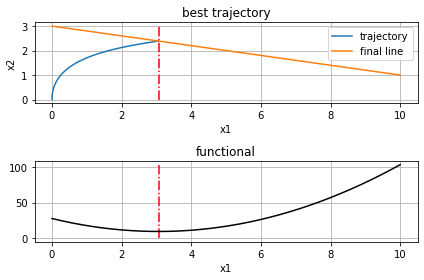

In [14]:
plt.subplot(2, 1, 1)

plt.plot(y_traj[0], y_traj[1])
plt.plot(x1_range, x2_range)
plt.vlines(x1_best, ymin=0, ymax=np.max(x2_range), colors="r", linestyles="dashdot")

plt.title("best trajectory")
plt.legend(["trajectory", "final line"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)

plt.subplot(2, 1, 2)

plt.plot(x1_range, J, "k", lw=1.5)
plt.vlines(x1_best, ymin=0, ymax=np.max(J), colors="r", linestyles="dashdot")

plt.title("functional")
plt.xlabel("x1")
plt.grid(True)

plt.tight_layout()
plt.show()